In [17]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation

In [2]:
df=pd.read_csv('/content/heart.csv')

In [5]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [9]:
df.shape

(918, 12)

In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Data** **Cleaning**

a) Check the data type.

The variables types are

categorical
Continuous: age, trestbps, chol, thalac, oldpeak

In [13]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [14]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

b. Check for the data characters mistakes

In [20]:
df['MaxHR'].unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126,  93, 131, 149, 123, 182, 141,  77,
       109, 133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,
        60,  70, 163,  67,  78,  84, 111,  80, 107, 161,  69,  88,  73,
       159, 151, 181, 186, 177, 173, 169, 171, 147,  71, 192, 195, 194,
       187, 202])

In [22]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [24]:
df.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

c) Check for missing values and replace them

In [27]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

d) Check for duplicate rows

In [29]:
duplicated=df.duplicated().sum()
if duplicated:
  print('Duplicates Rows in Dataset are:{}'.format(duplicated))
else:
  print('Dataset not contains any duplicates values')

Dataset not contains any duplicates values


e) Statistics summary

In [30]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Visualizing** **the** **univariate** **or** **bivariate** **distribution** **of** **data**

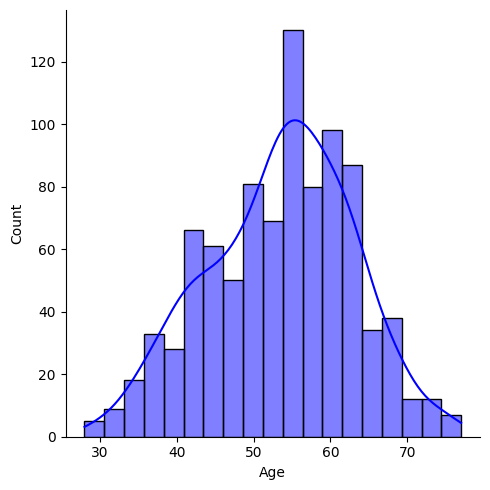

In [42]:
sns.displot(df['Age'], kde = True, color = 'blue')

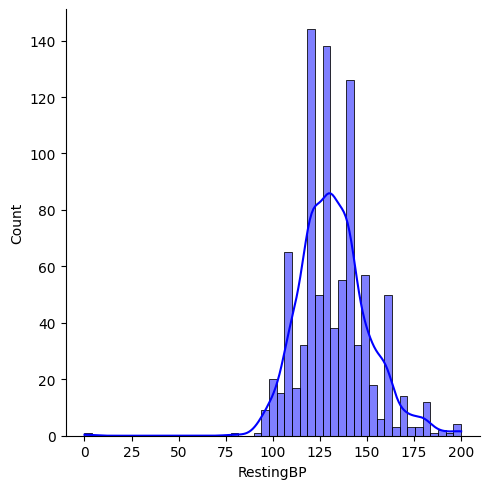

In [43]:
sns.displot(x = df['RestingBP'], kde = True, color = 'blue')

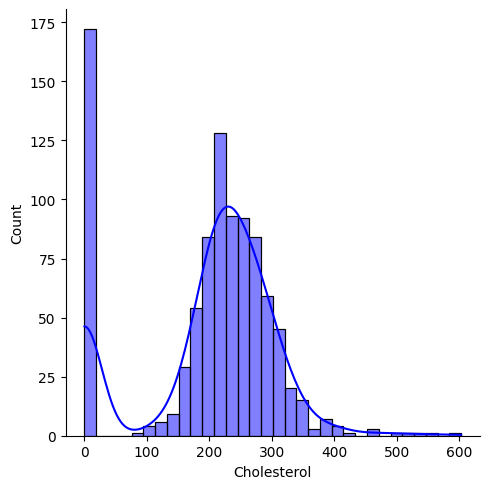

In [44]:
sns.displot(df['Cholesterol'], kde = True, color = 'blue')

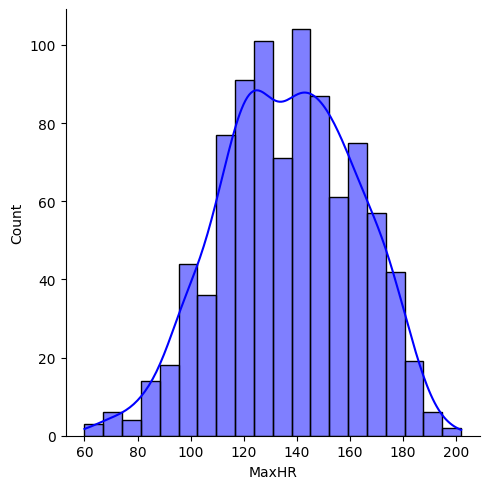

In [45]:
sns.displot(df['MaxHR'], kde = True, color = 'blue')

**Pie** **charts**

<Axes: >

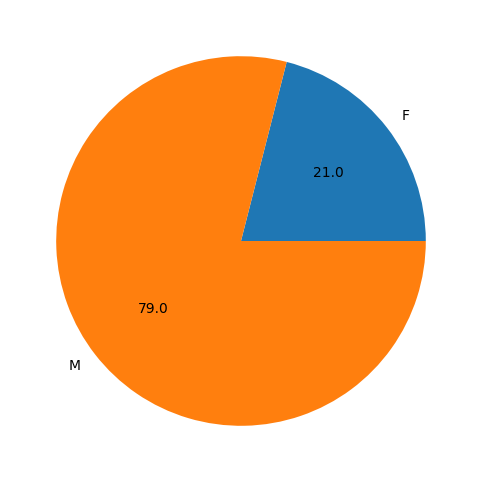

In [47]:
df.groupby('Sex').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

<Axes: >

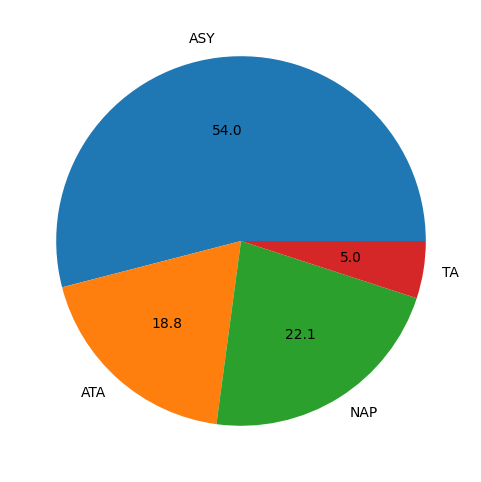

In [48]:
df.groupby('ChestPainType').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

<Axes: >

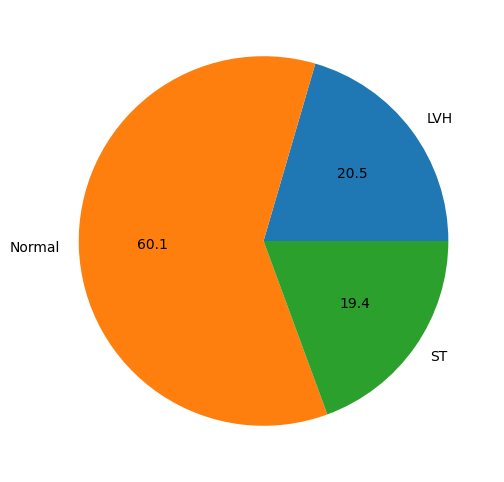

In [49]:
df.groupby('RestingECG').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

<Axes: >

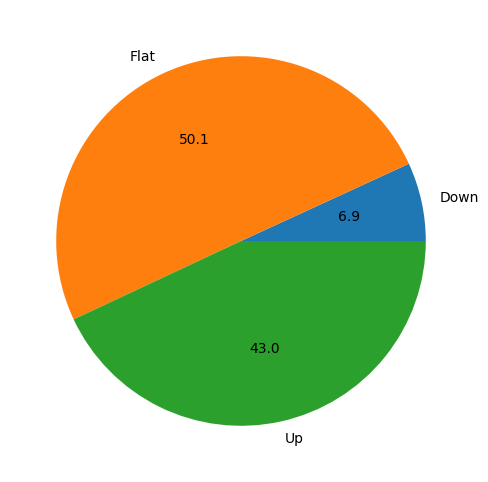

In [50]:
df.groupby('ST_Slope').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

**Violin** **plot**

<Axes: xlabel='Age'>

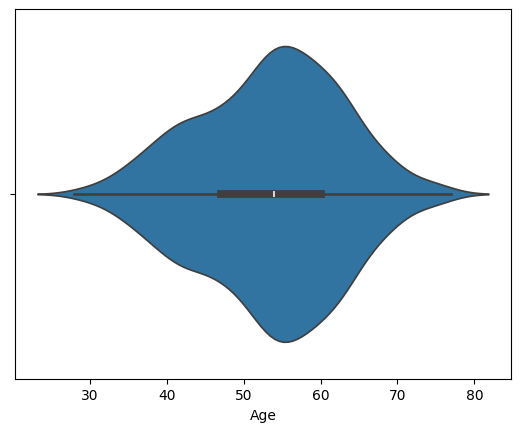

In [54]:
sns.violinplot(x = df['Age'])

<Axes: xlabel='HeartDisease', ylabel='Sex'>

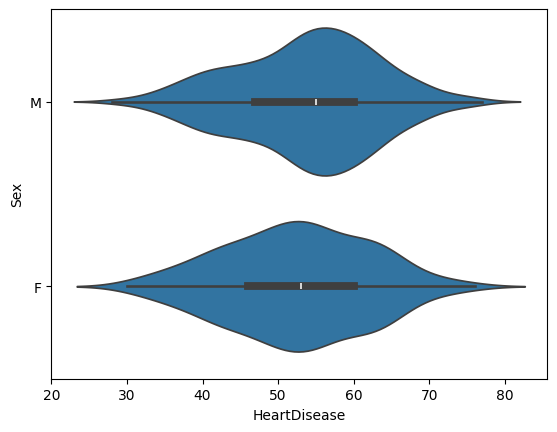

In [55]:
sns.violinplot(y = df['Sex'], x = df['HeartDisease'])

<Axes: xlabel='Sex', ylabel='Age'>

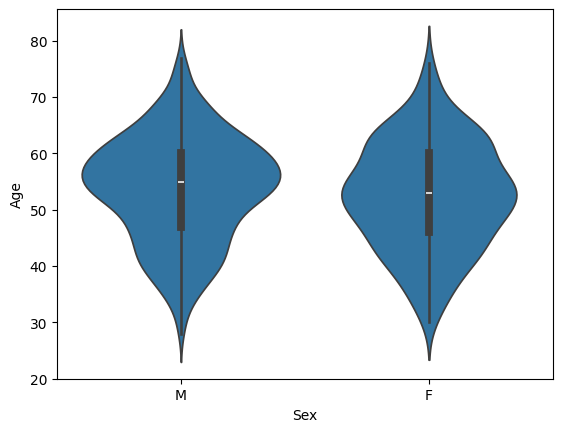

In [59]:
sns.violinplot(y = df['Age'],x = df['Sex'])

<Axes: xlabel='Sex', ylabel='Cholesterol'>

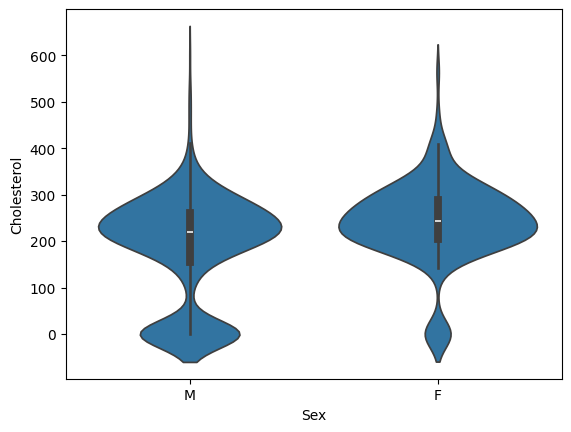

In [61]:
sns.violinplot(y = df['Cholesterol'], x = df['Sex'])

**Correlation** (**HeatMap**)

In [62]:
df.corr()

<ipython-input-62-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,RestingBP,Cholesterol,MaxHR,HeartDisease
Age,1.000000,0.254399,-0.095282,-0.382045,1.000000
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.254399
Cholesterol,-0.095282,0.100893,1.000000,0.235792,-0.095282
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.382045
HeartDisease,1.000000,0.254399,-0.095282,-0.382045,1.000000


<ipython-input-63-aa4f4450a243>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

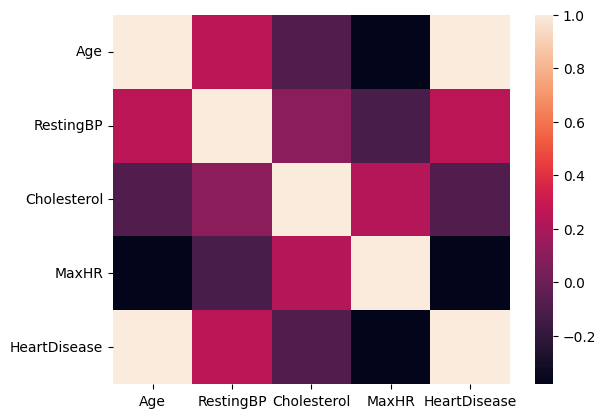

In [63]:
sns.heatmap(df.corr())

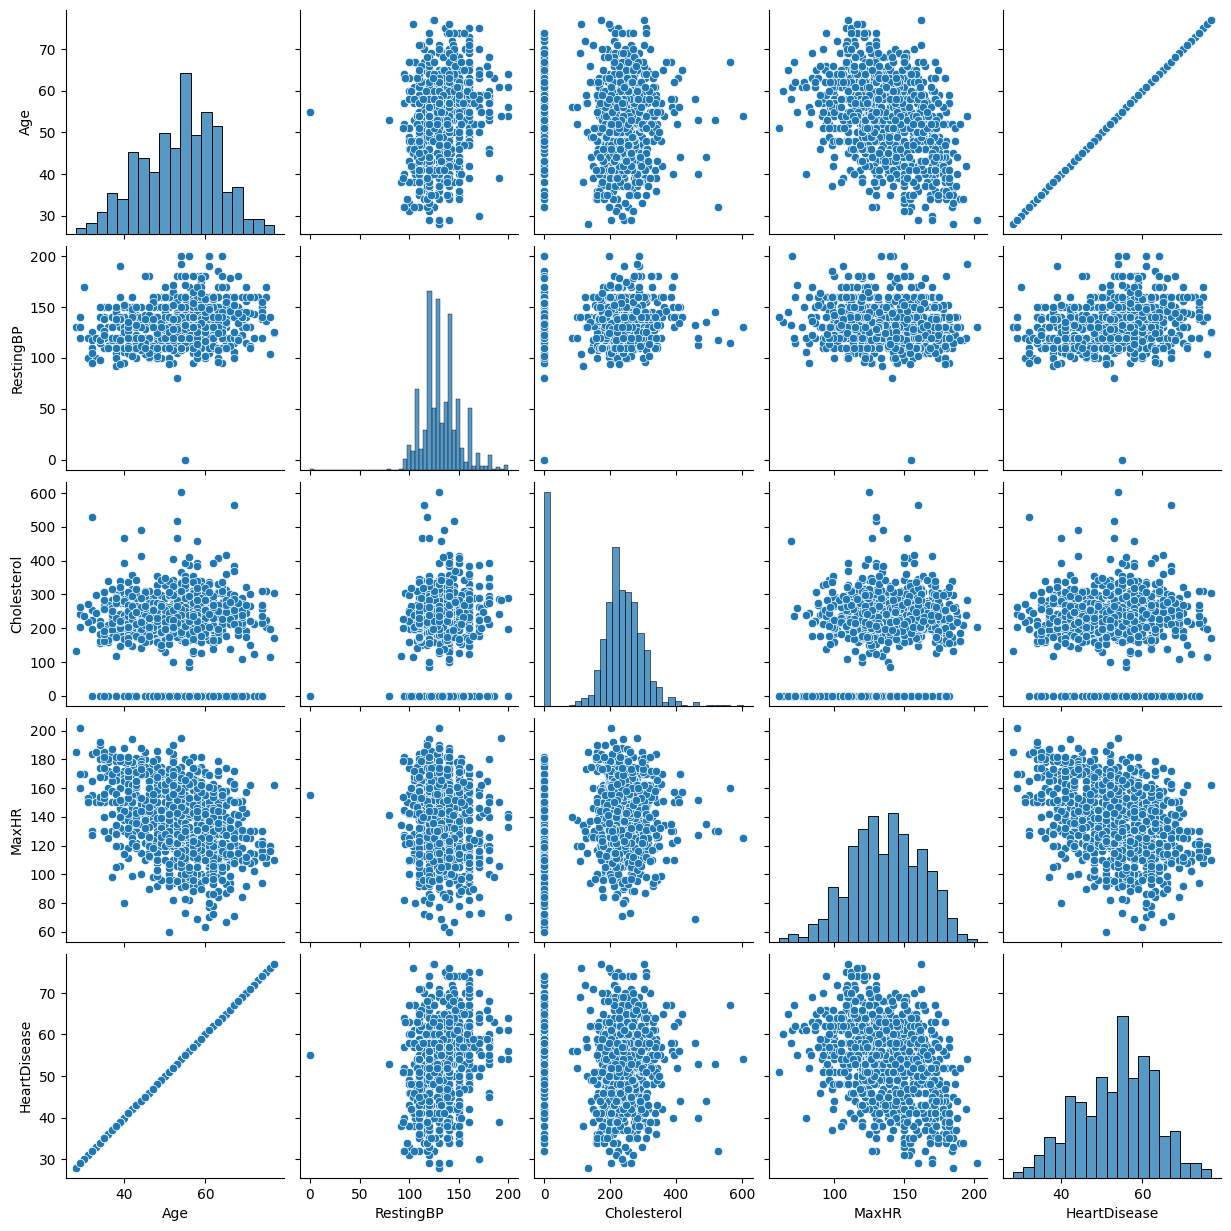

In [65]:
sns.pairplot(df)

**Correlation** (**JointPlot**)

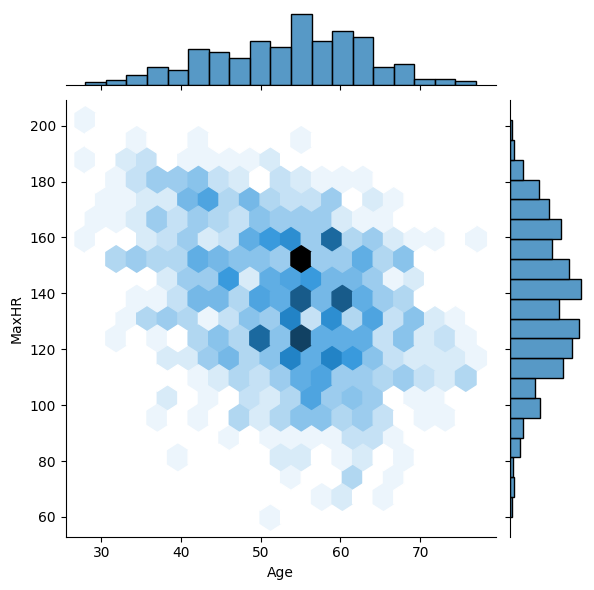

In [67]:
sns.jointplot(x = 'Age' , y = 'MaxHR', data = df, kind = 'hex')

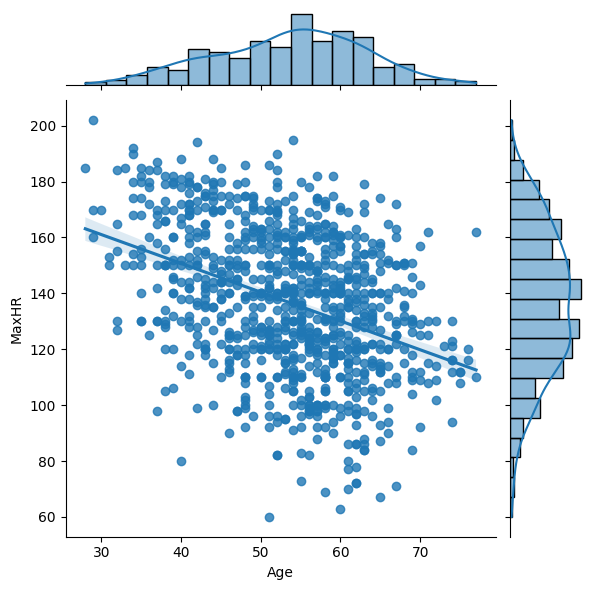

In [68]:
sns.jointplot(x = 'Age' , y = 'MaxHR', data = df, kind = 'reg')

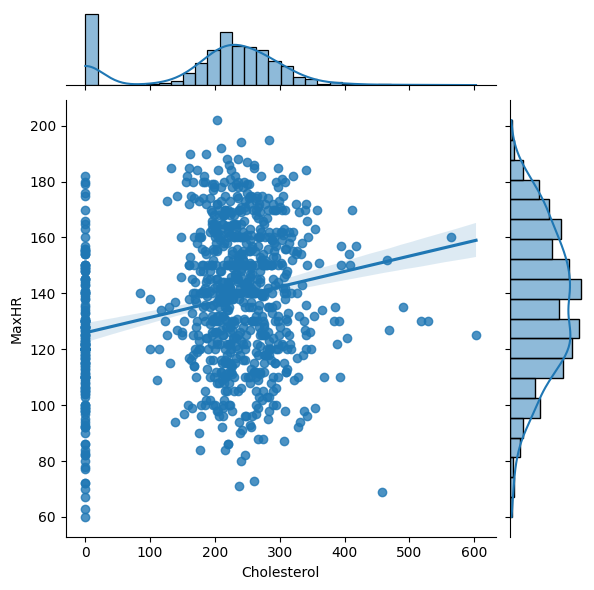

In [69]:
sns.jointplot(x = 'Cholesterol' , y = 'MaxHR', data = df, kind = 'reg')

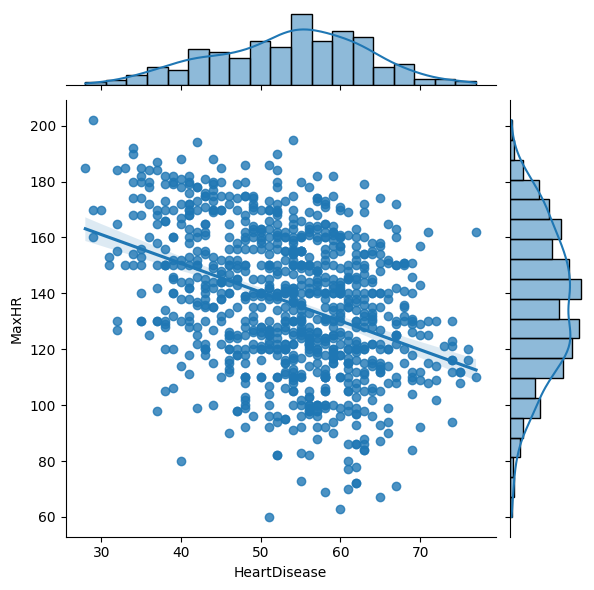

In [70]:
sns.jointplot(x = 'HeartDisease' , y = 'MaxHR', data = df, kind = 'reg')